# Atraso de vuelos Aeropuerto de Santiago

Vicente Martínez Godoy

## Librerias

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import csv

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, mean_squared_error, plot_confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from xgboost import plot_importance, XGBClassifier
 

import warnings
warnings.filterwarnings("ignore")

## Funciones

In [5]:
def write_csv(entrada,salida):
    with open(salida+".csv", mode = "w") as file:
        file = csv.writer(file, delimiter = ";")
        file.writerow(["temporada_alta","dif_min","atraso_15","periodo_dia"])
        for i in df.index:

            file.writerow([df['temporada_alta'][i], df['dif_min'][i],
                          df['atraso_15'][i], df['periodo_dia'][i]])
        

In [179]:
def matrix_confusion(cm):   
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Matriz de Confusión');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(["0","1"])
    ax.yaxis.set_ticklabels(["0","1"])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
def graph_rate(var,data,titulo):
    data.reset_index(drop = False, inplace = True)
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.6)
    axis = sns.barplot(x = var , y = "atraso_15", data = data)
    axis.bar_label(axis.containers[0], fontsize = 14)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
    plt.xlabel('TASA DE VUELOS ATRASADOS POR '+titulo, fontsize=18)
    plt.ylabel('TASA', fontsize=18)
    plt.tight_layout()
    plt.show()

In [7]:
def barplot(variable, titulo):   
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.6)
    axis = sns.countplot(x = df[variable], orient = "v")
    axis.set_xticklabels(axis.get_xticklabels(), rotation=0, ha='center')
    axis.bar_label(axis.containers[0], fontsize = 18)
    plt.title('Frecuencia de la variable '+titulo, fontsize=24)
    plt.xlabel(variable, fontsize=18)
    plt.ylabel('CANTIDAD', fontsize=18)
    plt.tight_layout()
    plt.show()

In [8]:
def barplot_dest(sigla,titulo):
    plt.figure(figsize=(20, 10))
    sns.set(font_scale=1.6)
    axis = sns.countplot(x=df[sigla], data=df, order=df[sigla].value_counts().iloc[0:len(df)].index, orient = "h")
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='center')
    axis.bar_label(axis.containers[0], fontsize = 12)
    plt.title('Frecuencia de la variable '+titulo, fontsize=12)
    plt.xlabel('NOMBRE DE DESTINO', fontsize=12)
    plt.ylabel('CANTIDAD DE VUELOS', fontsize=12)
    plt.tight_layout()
    plt.show()

In [9]:
def temporada(FECHA):
    temporada_alta = []
    for i in range(len(df[FECHA])):
        if (df[FECHA].iloc[i] >  pd.to_datetime("2016-12-15")) and (df[FECHA].iloc[i] <  pd.to_datetime("2017-03-03")):
            temporada_alta.append("1")
        elif (df[FECHA].iloc[i] > pd.to_datetime("2017-07-15")) and (df[FECHA].iloc[i] < pd.to_datetime("2017-07-31")):
            temporada_alta.append("1")
        elif (df[FECHA].iloc[i] > pd.to_datetime("2017-09-11")) and (df[FECHA].iloc[i] < pd.to_datetime("2017-09-30")):
            temporada_alta.append("1")
        else:
            temporada_alta.append("0")
    return temporada_alta

In [10]:
def periodo(data):
    df["periodo_dia"] = 0
    for i in range(len(df)):
        if  (df[data].iloc[i] >= pd.to_datetime("19:00", format='%H:%M').time()) or (df[data].iloc[i] <= pd.to_datetime("04:59", format='%H:%M').time()):
            df['periodo_dia'].iloc[i] = "Noche"
        if  (df[data].iloc[i] >= pd.to_datetime("05:00", format='%H:%M').time()) and(df[data].iloc[i] <= pd.to_datetime("11:59", format='%H:%M').time()):
            df['periodo_dia'].iloc[i] = "Mañana"
        if  (df[data].iloc[i] >= pd.to_datetime("12:00", format='%H:%M').time()) and (df[data].iloc[i] <= pd.to_datetime("18:59", format='%H:%M').time()):
            df['periodo_dia'].iloc[i] = "Tarde"
    df.drop('periodo_dia1', axis=1, inplace=True)

# Importar los datos

In [125]:
print ("Leyendo el archivo CSV")
df = pd.read_csv("dataset_SCL.csv")

Leyendo el archivo CSV


In [126]:
df.head(1)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami


In [127]:
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [129]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

Solo 3 variables de la base de datos son enteros (DIA, MES, AÑO).

# 1. Análisis de los datos

¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?


### DIANOM

Para la variable de los dias de semana, existe una distribución casi uniforme. Sin embargo, el día sábado, se observa un descenso considerable. En cuánto a la razón de los vuelos excluyendo el día mencionado, pueden apuntar a diversas motivaciones de los pasajeros de los vuelos. Ahora bien, al realizar una reserva área existe una planificación en el itinerario de cada viajero, por lo que se puede inferir que el día sábado ya se encuentran en sus destinos, tanto para un viaje de fin de semana, como también un viaje que comprenda más días.

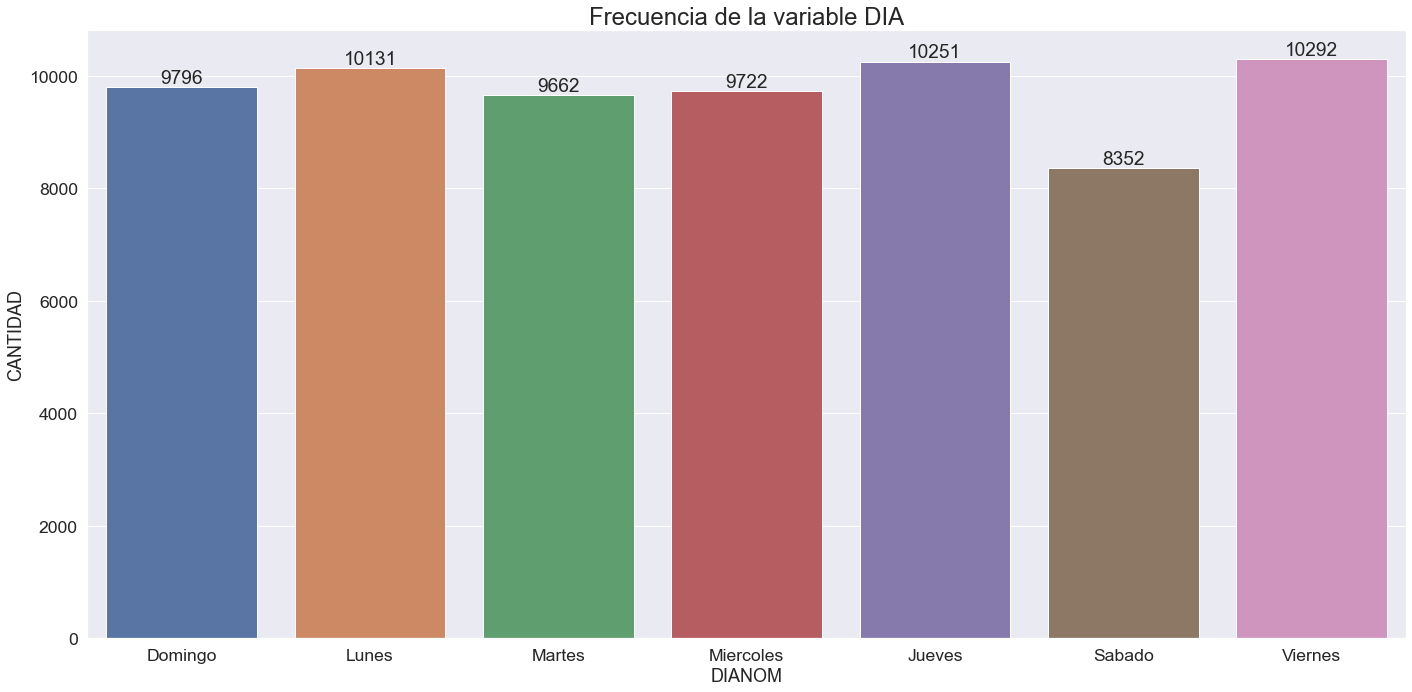

In [156]:
barplot("DIANOM","DIA")

### MES

Se observa un incremento de viajes/vuelos, en los meses de enero,octubre, noviembre y diciembre, dada posiblemente por las vacaciones de verano en el hemisferio sur, y en el mes de Julio, por las vacaciones de invierno. A partir de lo mismo, se puede relacionar que los viajes realizados en dichos meses, podrían apuntar a una planificación familiar de viajes, debido a que coincide además con las vacaciones escolares. En cuánto a los meses que no consideran un alza, se puede relacionar que responden la rutina anual de cada persona tanto laboralmente, como académicamente. 

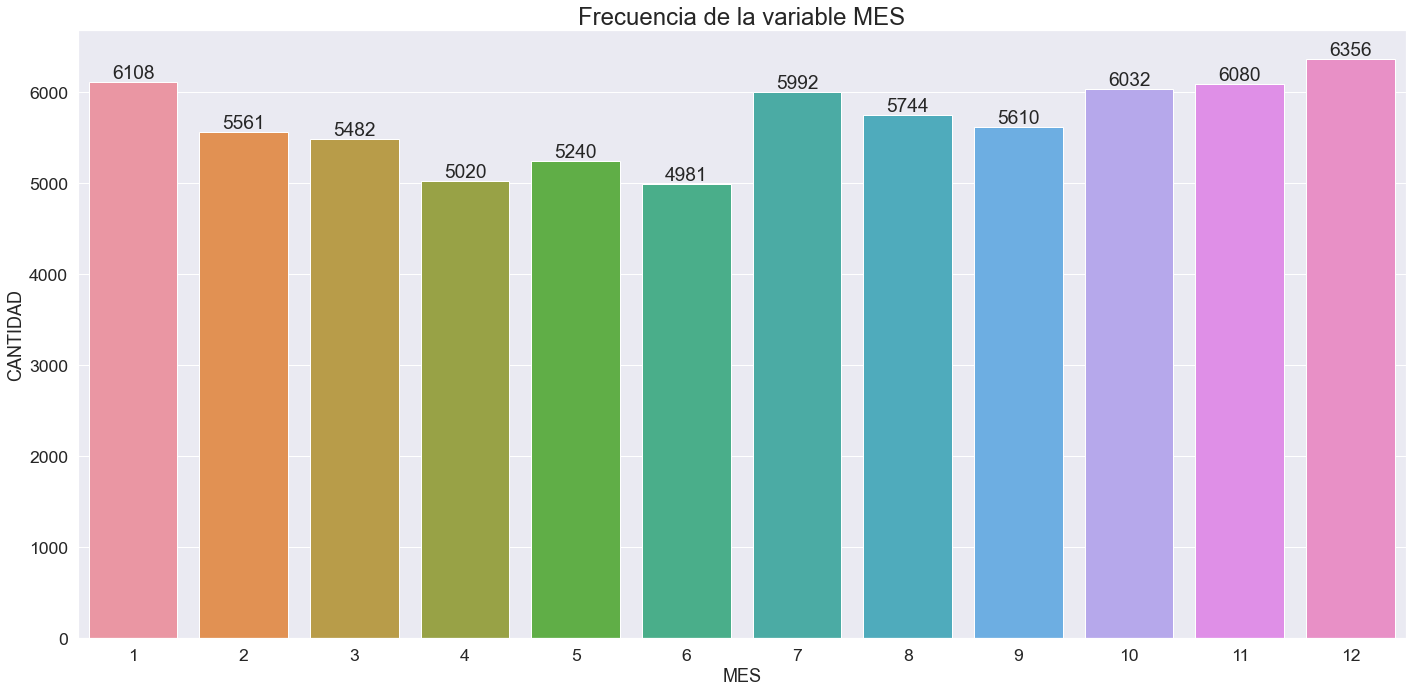

In [131]:
barplot("MES","MES")

## Día

Se observa una distribución casi uniforme, exceptuando por los días 29, 30 y principalmente el día 31. Esto último, se deduce de la variación mensual de los días en el calendario, debido a que siete meses de doce tienen 31 días. No se puede establecer un patrón de viaje en los días restantes ya que presentan una cantidad similar que fluctua entre los 2179-2290, es decir, el porcentaje entre días no supera el 4,3% de diferencia.

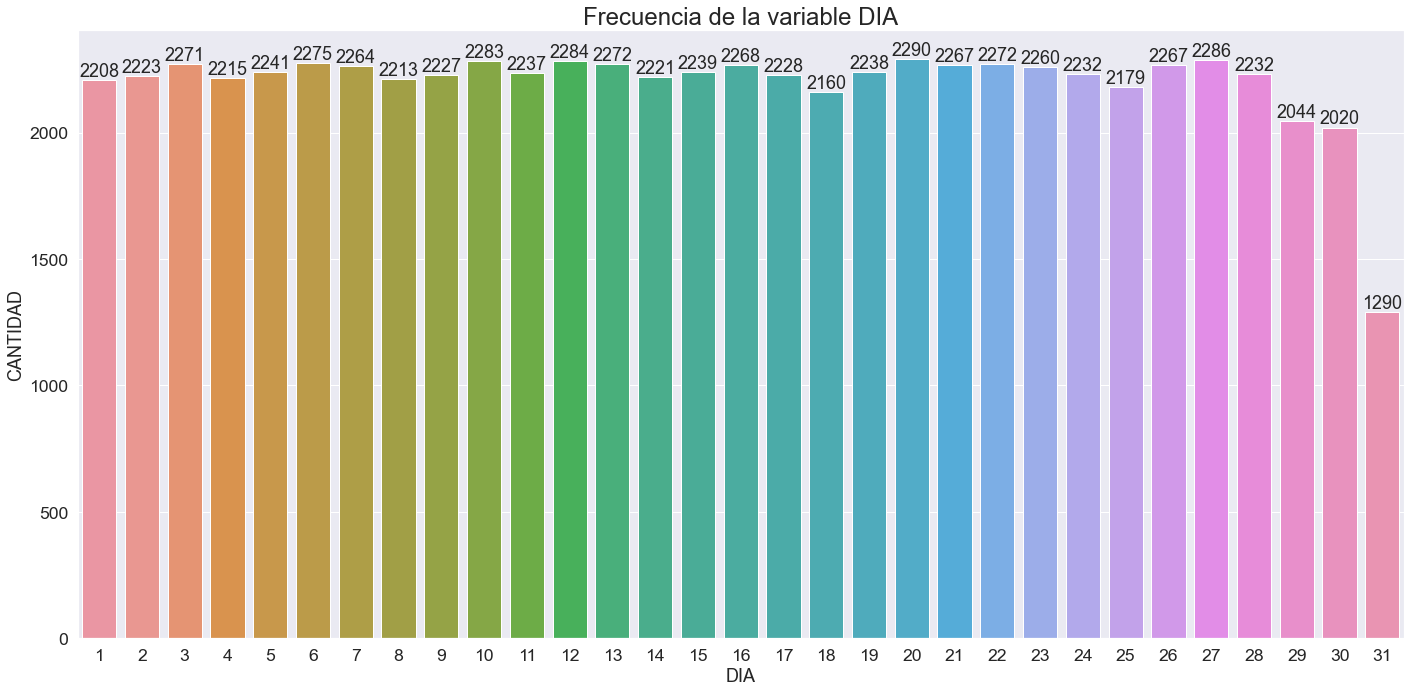

In [160]:
barplot("DIA","DIA")

### TipoVuelo

La frecuencia de vuelos nacionales e internacionales presentan una diferencia de 13% aproximado. Por lo que se puede concluir que no hay una preferencia al alza al momento de viajar.

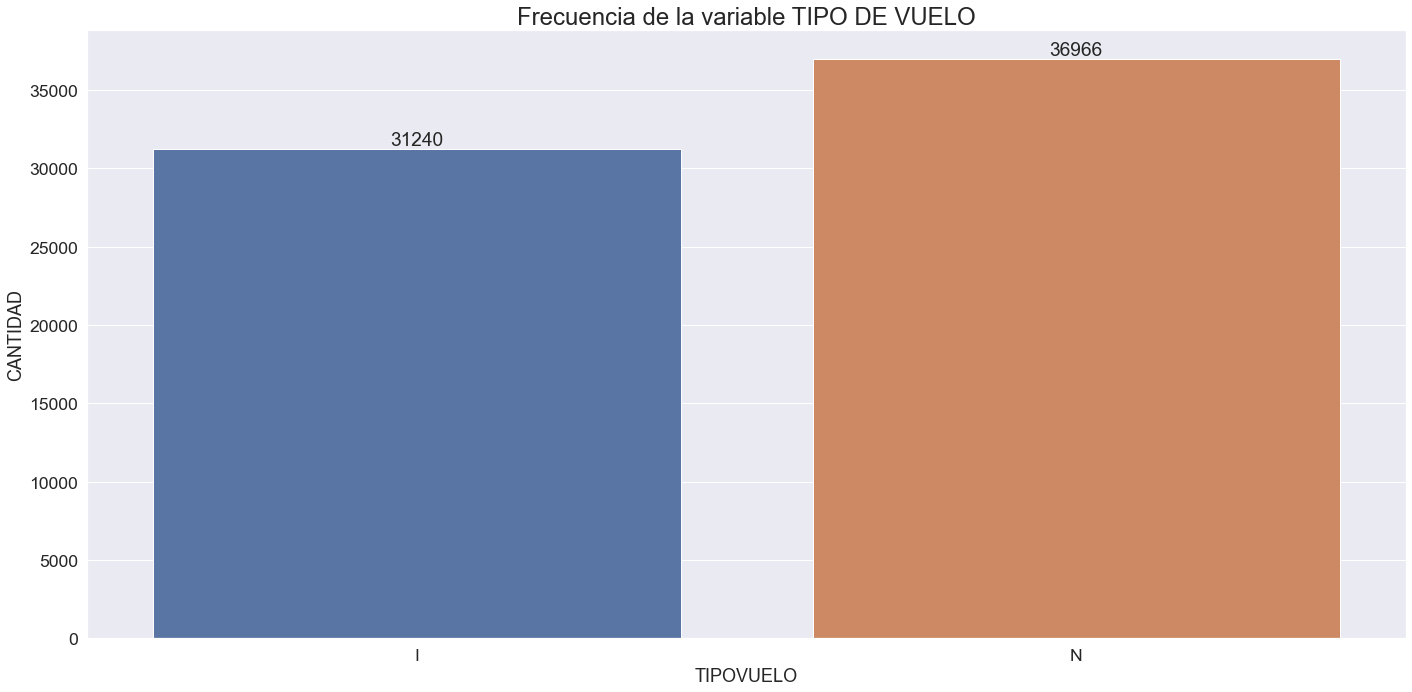

In [155]:
barplot("TIPOVUELO","TIPO DE VUELO")

### OPERA

Las aereolíneas que poseen la mayor cantidad de vuelos ya sean nacionales o internacionales, son Grupo LATAM y Sky Airline, ya que esto se puede ver porque son las más conocidas debido a que el origen es Santiago de Chile.

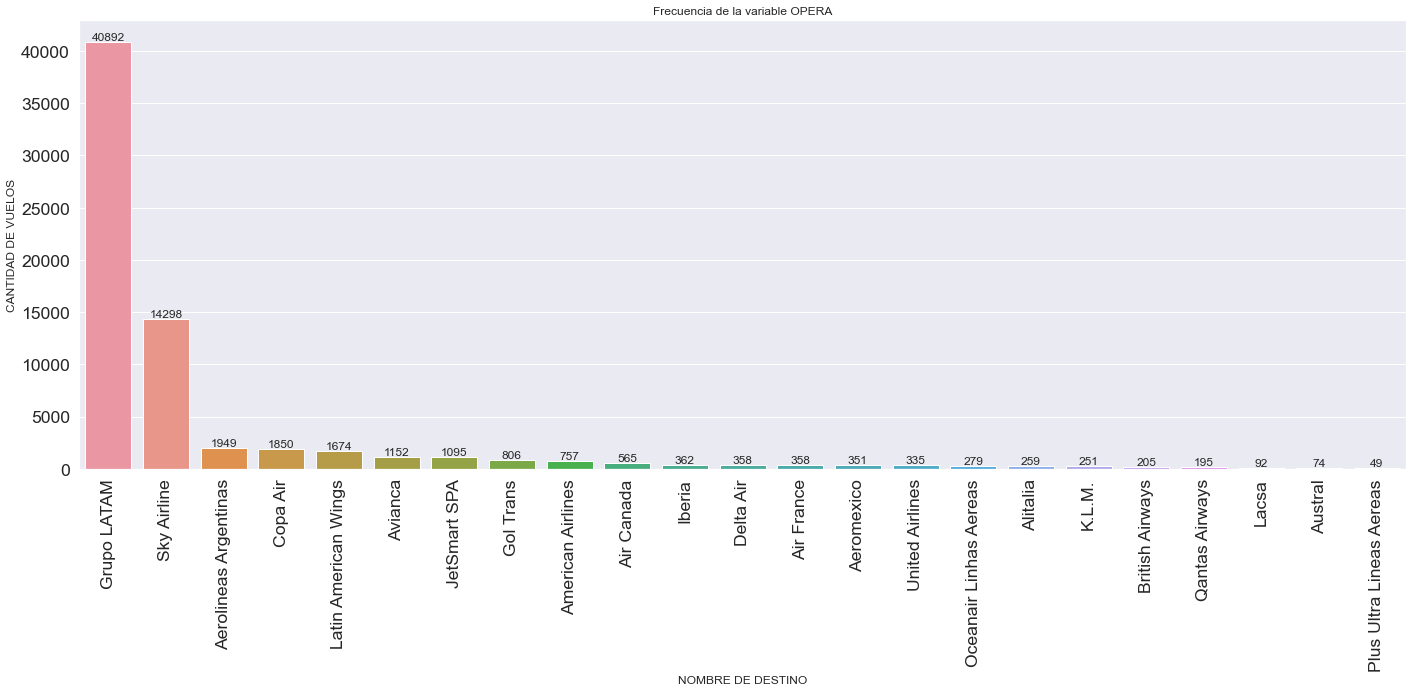

In [157]:
barplot_dest("OPERA","OPERA")

### SIGLADES

Se puede observar un decaimiento exponencial en los destinos presentado, donde Buenos Aires y Antofagasta son los lugares donde hubo una mayor cantidad de vuelos. Mientras que hay destinos como Washington, Pisco Perú, Puerto Stanley o Cochabamba que solamente hubo un vuelo, que apuntan a la cantidad de personas que están interesados en aquellos destinos.

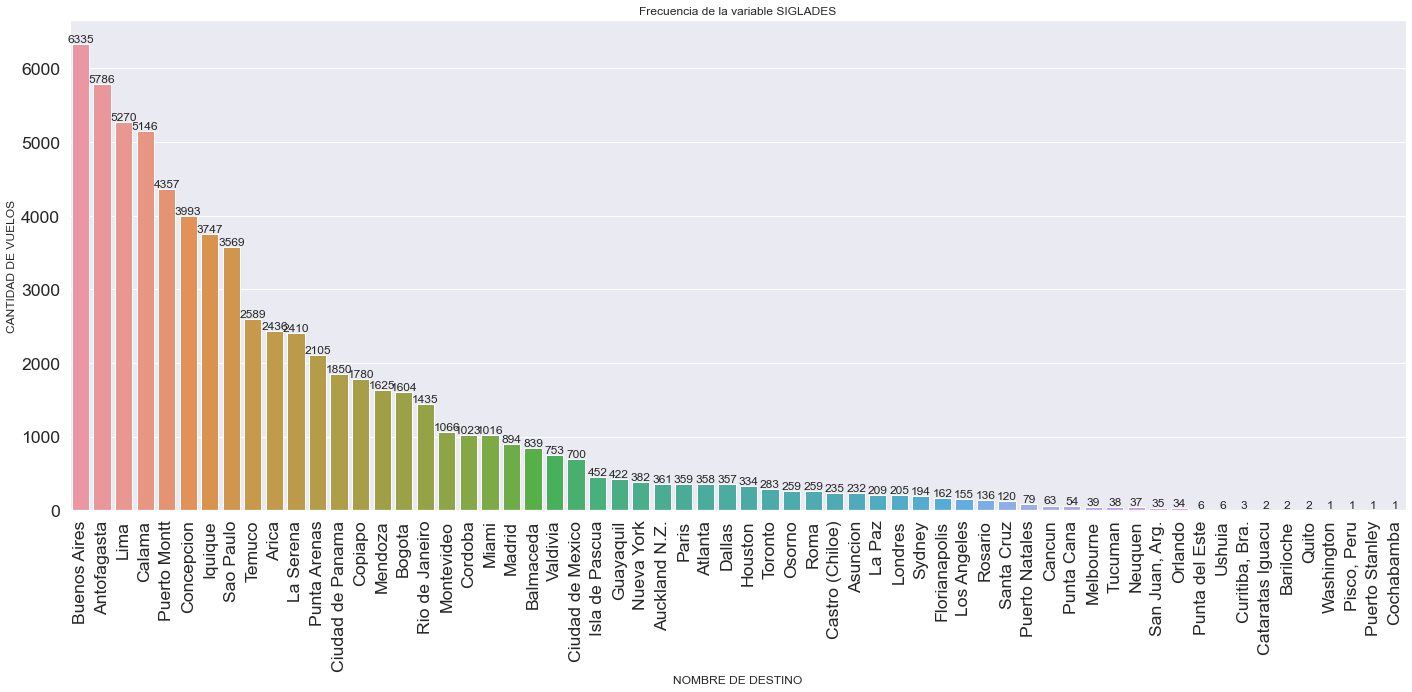

In [145]:
barplot_dest("SIGLADES","SIGLADES")

# 2. Generación de las columnas adicionales

 Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

### Temporada Alta

In [130]:
temporada_alta = temporada("Fecha-I")
df["temporada_alta"] = temporada_alta
df["temporada_alta"].unique()

array(['1', '0'], dtype=object)

<AxesSubplot:xlabel='temporada_alta', ylabel='count'>

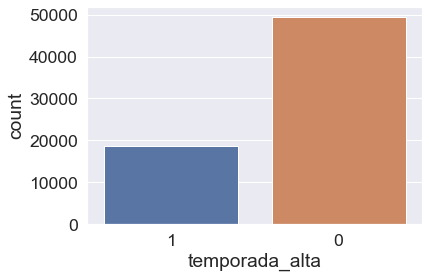

In [131]:
sns.countplot(x="temporada_alta", data=df)

### dif_min

In [132]:
df["dif_min"] = df['Fecha-O'] - df['Fecha-I']
df["dif_min"] = df["dif_min"].apply(lambda x: x.total_seconds() / 60)

### atraso_15

In [133]:
df["atraso_15"] = df["dif_min"].apply(lambda x: 1 if x > 15 else 0)

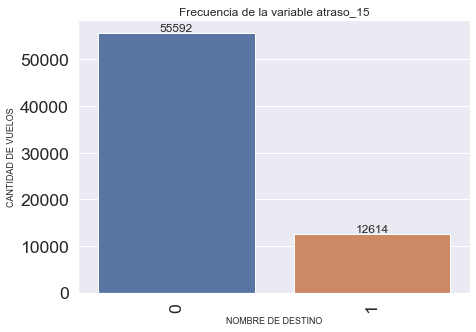

In [134]:
plt.figure(figsize=(7, 5))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df["atraso_15"], data=df, order=df["atraso_15"].value_counts().iloc[0:len(df)].index, orient = "h")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='center')
axis.bar_label(axis.containers[0], fontsize = 12)
plt.title('Frecuencia de la variable atraso_15', fontsize=12)
plt.xlabel('NOMBRE DE DESTINO', fontsize=9)
plt.ylabel('CANTIDAD DE VUELOS', fontsize=9)
plt.tight_layout()
plt.show()

### Periodo día

In [135]:
df["periodo_dia1"] = df["Fecha-I"].dt.time

In [136]:
periodo("periodo_dia1")

In [137]:
print(df.groupby('periodo_dia').size())

periodo_dia
Mañana    25352
Noche     17348
Tarde     25506
dtype: int64


### Creación de synthetic_features csv

In [254]:
write_csv(df,"synthetic_features")

# 3. Tasa de atraso

 ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?


## Por Destino

La tasa de atraso por destino, es una variable muy heterogénea, ya que por ejemplo hay destinos como Quito, que tiene 100% de atraso, pero solamente hubo 2 vuelos. Al igual que los viajes a Washington, este destino tiene un 0% de atraso, pero solo hubo 1 viaje, los extremos no aportan información debido a la cantidad de vuelos a los destinos.

In [59]:
rate_per_destination = pd.DataFrame(df.groupby(["SIGLADES"])["atraso_15"].mean())
rate_per_destination = rate_per_destination.sort_values(by='atraso_15', ascending=False)

In [61]:
rate_per_destination.head(10)

,atraso_15
SIGLADES,
Quito,1.000000
Puerto Stanley,1.000000
Cochabamba,1.000000
Ushuia,0.666667
Sydney,0.582474
Melbourne,0.538462
Bariloche,0.500000
Rosario,0.397059
Auckland N.Z.,0.373961


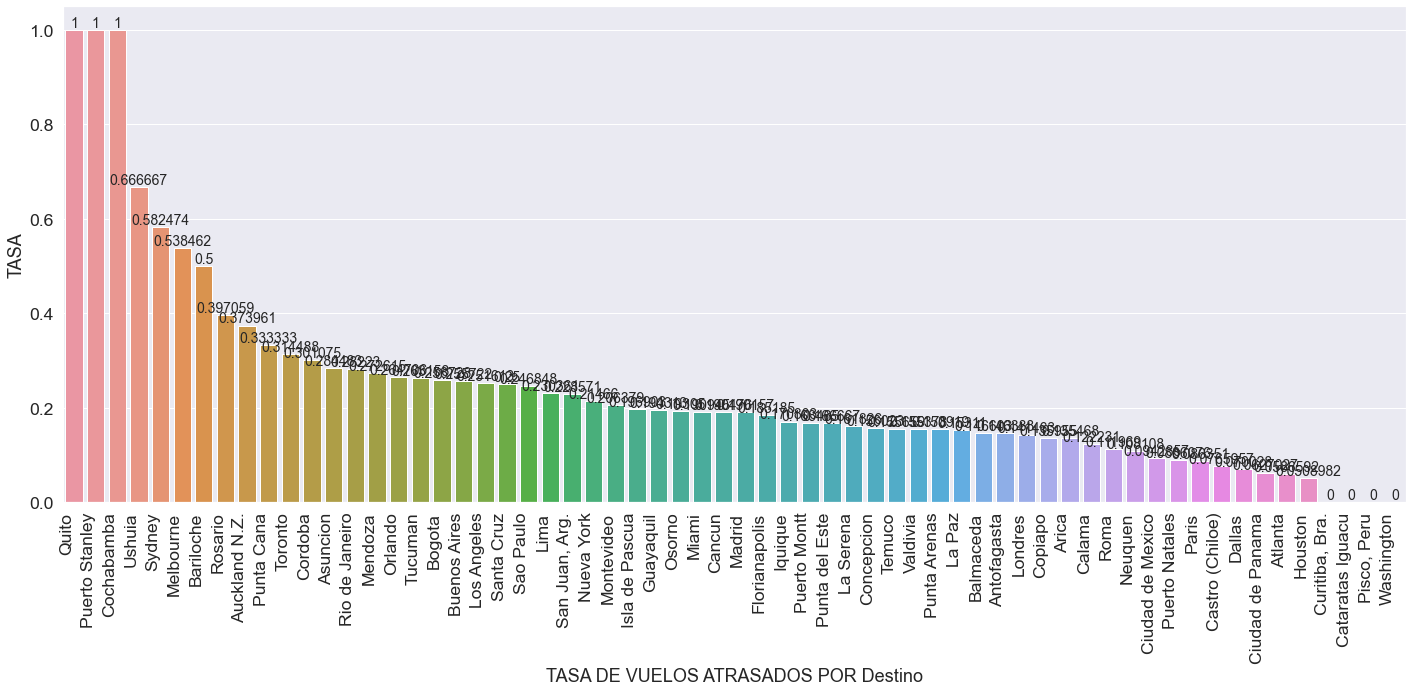

In [155]:
graph_rate("SIGLADES",rate_per_destination,"Destino")

## Por Aerolínea

Se puede observar grandes diferencias en los atrasos por las aerolíneas, en cuánto a  la aerolínea Plus Ultra Lineas Aereas posee un 61% de atraso en sus viajes, esto quiere decir que 6 de cada 10 viajes estarán atrasados. A su vez Grupo LATAM y Sky Airline, que son las aerolíneas con mas viajes, poseen un 17% de atraso en sus vuelos, por el cáracter heterogéneo de los datos entregados se puede establecer que es información útil para la creación de un modelo predictivo.

In [149]:
rate_per_air = pd.DataFrame(df.groupby(["OPERA"])["atraso_15"].mean())
rate_per_air = rate_per_air.sort_values(by='atraso_15', ascending=False)
rate_per_air

,atraso_15
OPERA,
Plus Ultra Lineas Aereas,0.612245
Qantas Airways,0.579487
Air Canada,0.456637
Latin American Wings,0.406810
Gol Trans,0.356079
Avianca,0.265625
Aerolineas Argentinas,0.240123
Austral,0.202703
JetSmart SPA,0.178995


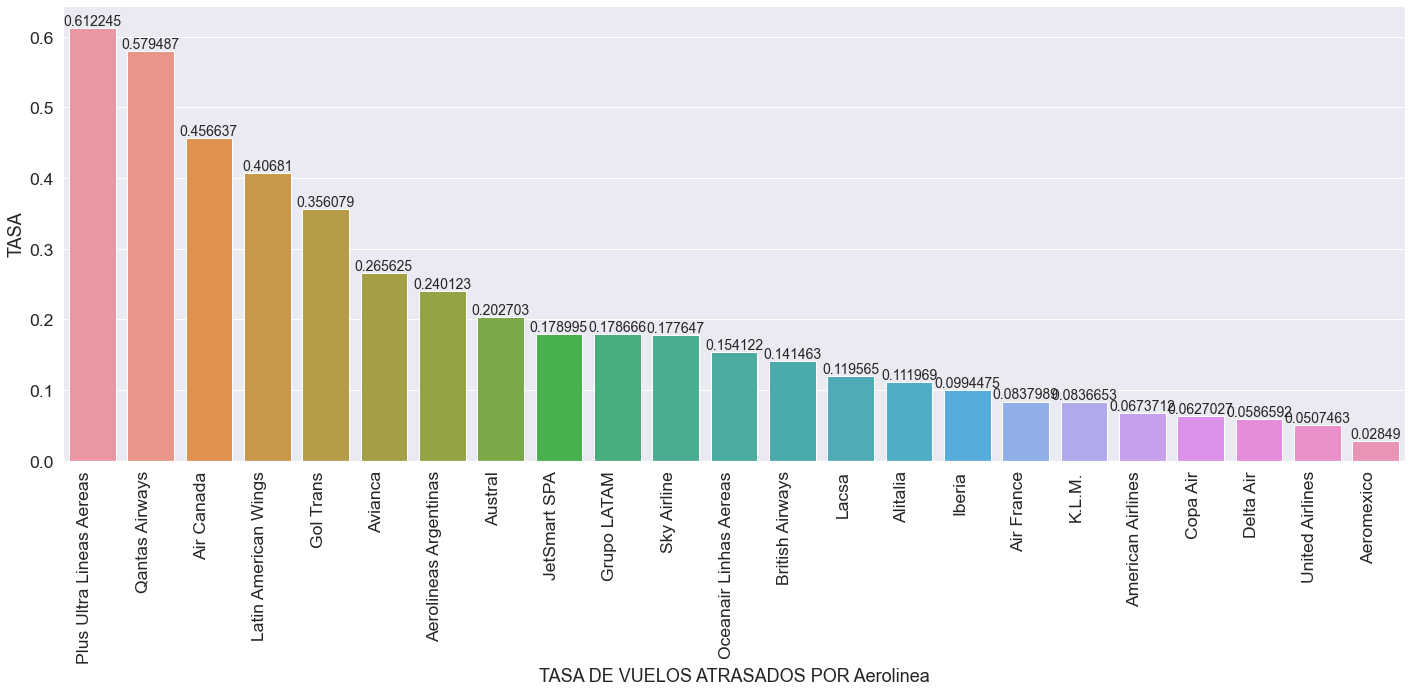

In [152]:
graph_rate("OPERA",rate_per_air,"Aerolinea")

## Por Mes del año

Se puede observar que los atrasos durante el año se concentran en los periodos de vacaciones, considerando los meses de julio, octubre  y diciembre, los que superan el 20% de atraso. Por lo que se puede establecer una correlación en las variables, por lo que a mayor cantidad de vuelos, mayor será la probabilidad de presentar atrasos.

In [99]:
rate_per_month = pd.DataFrame(df.groupby(["MES"])["atraso_15"].mean())
rate_per_month

,atraso_15
MES,
1,0.160118
2,0.151591
3,0.115104
4,0.116534
5,0.157824
6,0.171050
7,0.293391
8,0.173398
9,0.172371


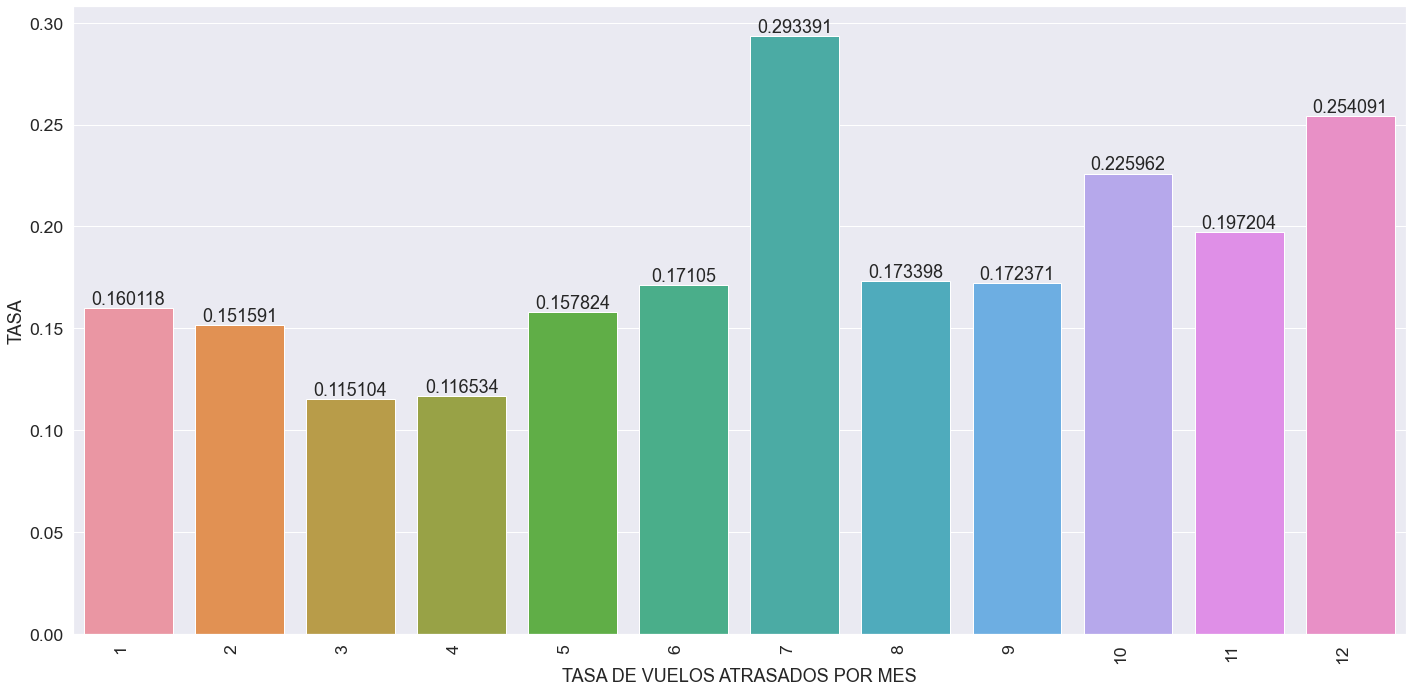

In [147]:
graph_rate("MES",rate_per_month,"MES")

## Por dia de la semana

Durante la semana, los días que presentan una cantidad mayor de atrasos son los lunes, jueves y viernes. Se puede establecer que apunta a la organización de itinerarios, teniendo como preferentes los días para hacer extensivo un fin de semana o bien, comenzar las vacaciones semanales.

In [139]:
rate_per_dianom = pd.DataFrame(df.groupby(["DIANOM"])["atraso_15"].mean())
rate_per_dianom

,atraso_15
DIANOM,
Domingo,0.161086
Jueves,0.199493
Lunes,0.202152
Martes,0.169116
Miercoles,0.170850
Sabado,0.163194
Viernes,0.222017


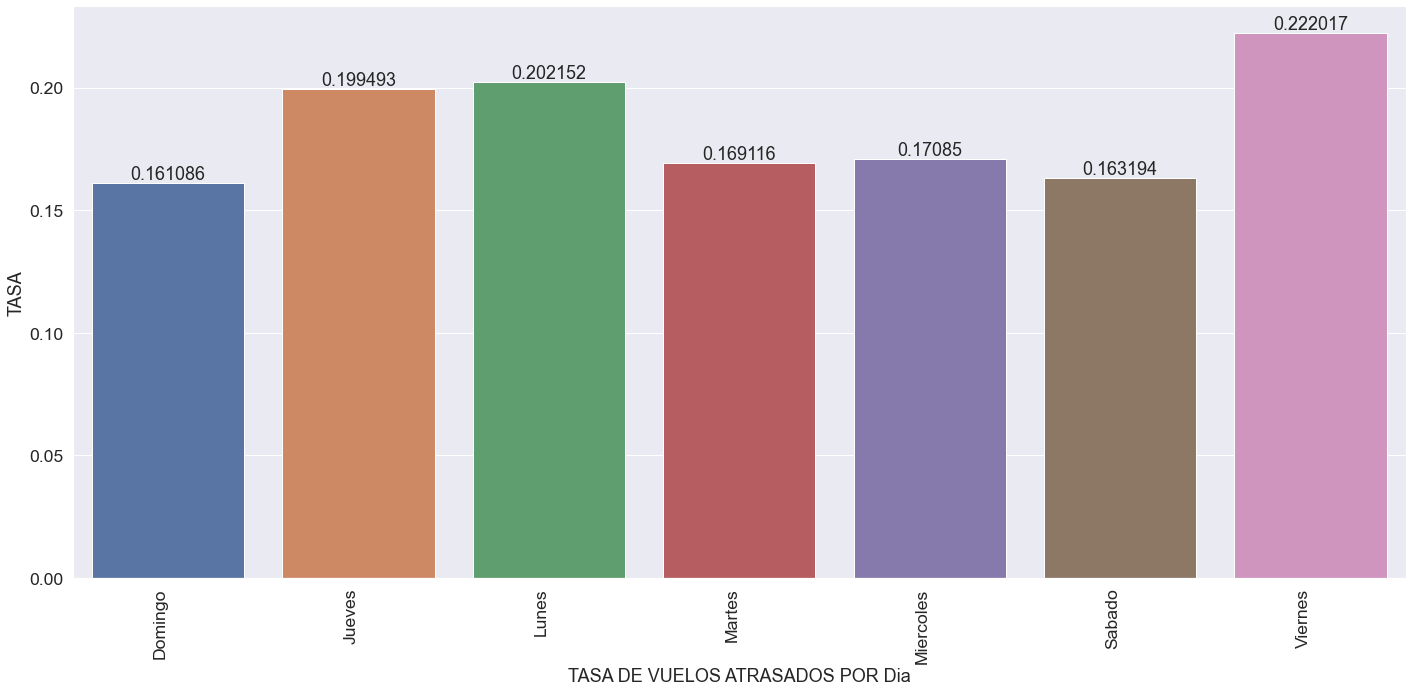

In [145]:
graph_rate("DIANOM",rate_per_dianom,"Dia")

## Por temporada

La tasa de atraso por temporada demuestra que no hay grandes diferencias entre las temporadas. Por lo tanto, no se puede considerar como un aporte para la realizacion de un modelo de predicción, ya que los factores de atraso podrían estar relacionados a otros factores contextuales, que no se relaciona de manera directa con la temporada alta o baja.

In [87]:
rate_per_season = pd.DataFrame(df.groupby(["temporada_alta"])["atraso_15"].mean())
rate_per_season

,atraso_15
temporada_alta,
0,0.186236
1,0.181517


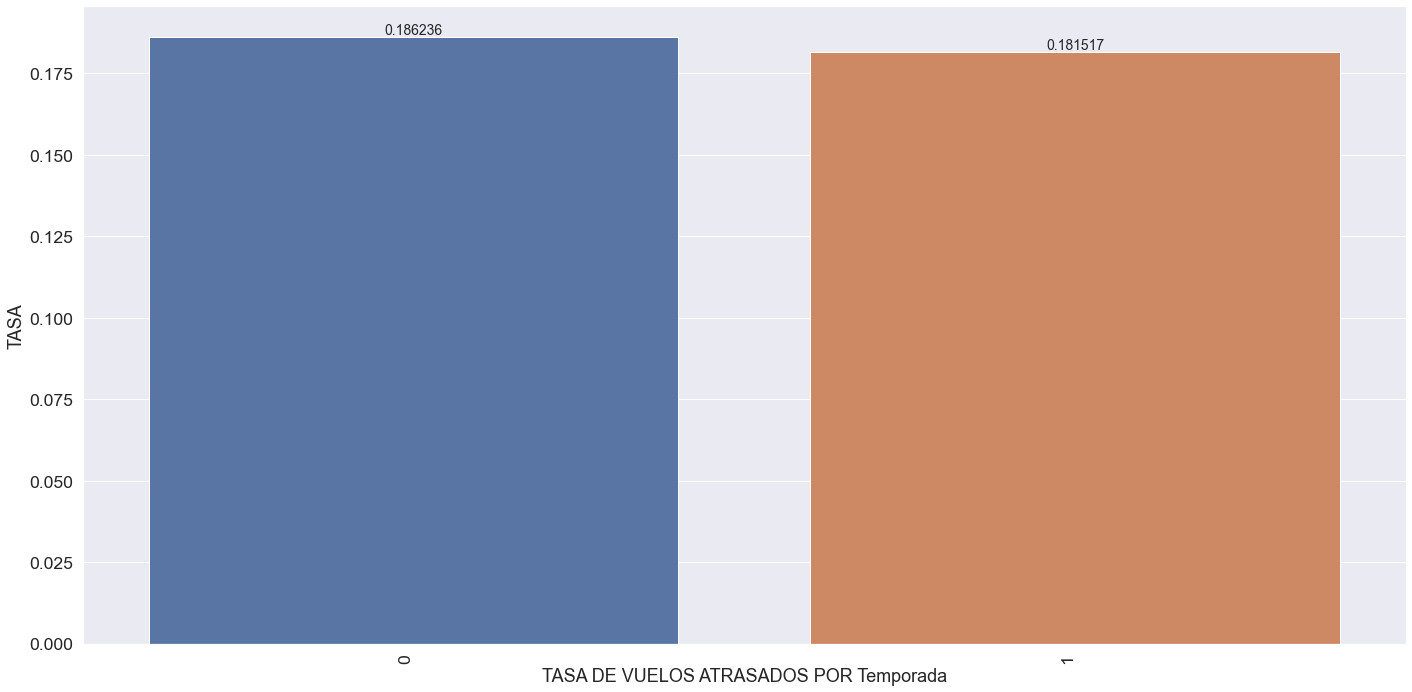

In [153]:
graph_rate("temporada_alta",rate_per_season,"Temporada")

## Por tipo de vuelo

Se puede observar que existe una diferencia en la tasa de atraso por tipo de vuelo, si es internacional o nacional. Demostrando que existe un 7% mas de atrasos en los viajes internacionales, por lo que se puede relacionar con la documentación exigida en los puertos de aduana y policía internacional, pasos que no influyen en los vuelos nacionales.

In [88]:
rate_per_type = pd.DataFrame(df.groupby(["TIPOVUELO"])["atraso_15"].mean())
rate_per_type

,atraso_15
TIPOVUELO,
I,0.225608
N,0.150571


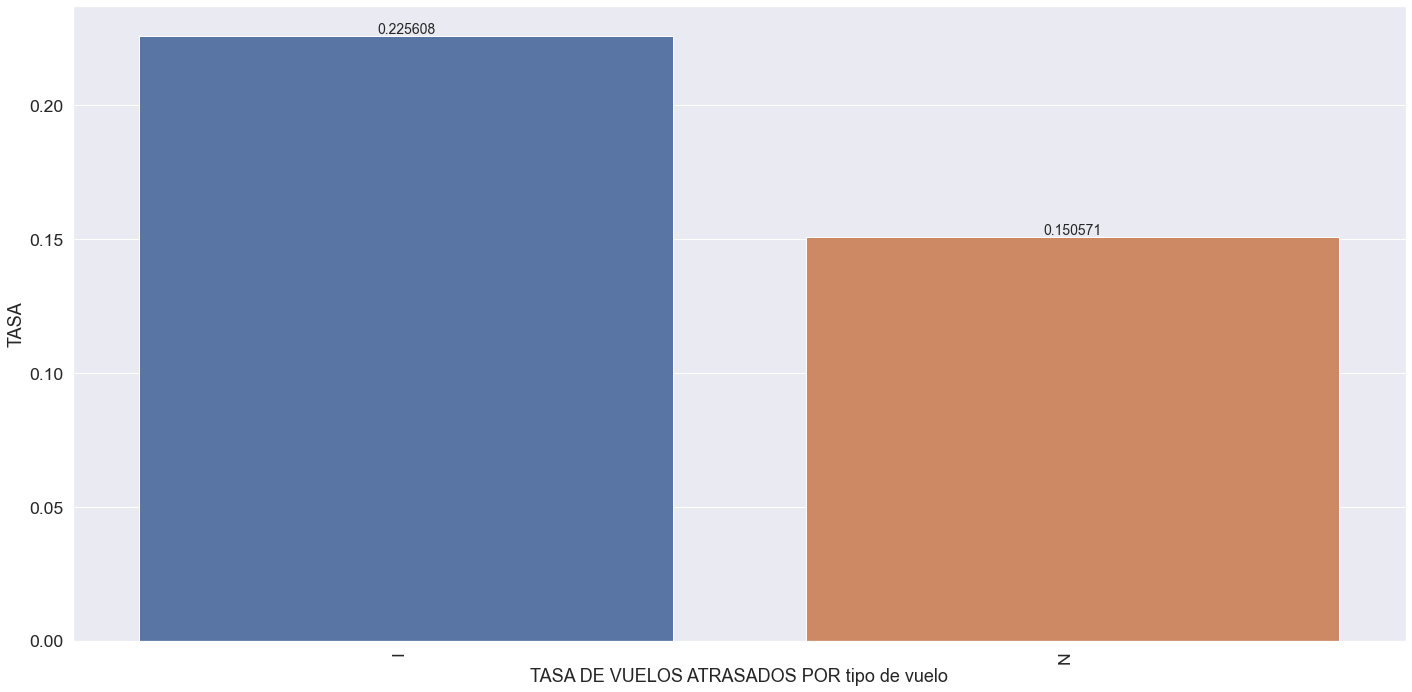

In [154]:
graph_rate("TIPOVUELO",rate_per_type,"tipo de vuelo")

Las variables que más influirían en un análisis estadístico, con respecto a la tasa de atraso, son el tipo de vuelo, específicamente los internacionales. Los vuelos con una mayor tasa de atraso son los que van a Quito, Puerto Stanley, Cochabamba y Ushuia. Las aerolíneas con una mayor tasa de atraso son Plus Ultra Líneas Aérea, Qantas Airways, Air Canada y Latín American Wings. Grupo LATAM y Sky Airline, son las aerolineas con la mayor cantidad de viajes, pero aún asi mantienen una tasa de atraso, menor a las empresas que realizan menos viajes. Y se puede observar que no existe una gran diferencia en cuanto a la tasa de atraso de si es temporada alta o no.


## 4. Modelado

Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas

Se utilizaran dos modelos, ambos poseen como base los arboles de decisiones ( Random forest y XGBoost). Para medir el rendimiento de estos, se utilizaran las metricas de accuracy, precision y recall, englobado en una matriz de confusión.

Las variables que se utilizaran son, DIA, MES, DIANOM, TIPOVUELO, OPERA, SIGLADES, PERIODO_DIA y TEMPORADA ALTA

### Train Test

In [187]:
df_x = df[['DIA', 'MES', 'DIANOM', 'TIPOVUELO','OPERA', 'SIGLADES', 'periodo_dia']]
df_y = df[["atraso_15"]]

### Transformacion de las variables categoricas a numericas 

las variables dianom, tipovuelo, opera , siglades y periodo dia son variables categoricas, por lo tanto para poder realizar el analisis se necesita pasar estos registros a numerico, utilizando un label encoding 

In [188]:
df_new = df_x[["DIANOM","TIPOVUELO","OPERA","SIGLADES","periodo_dia"]]

In [190]:
# Encode Categorical Columns
le = LabelEncoder()
df_new = df_new.apply(LabelEncoder().fit_transform)
df_x["DIANOM"] = df_new["DIANOM"]
df_x["TIPOVUELO"] = df_new["TIPOVUELO"]
df_x["OPERA"] = df_new["OPERA"]
df_x["SIGLADES"] = df_new["SIGLADES"]
df_x["periodo_dia"] = df_new["periodo_dia"]

In [191]:
df_x

,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,periodo_dia
0,1,1,0,0,5,34,1
1,2,1,2,0,5,34,1
2,3,1,3,0,5,34,1
3,4,1,4,0,5,34,1
4,5,1,1,0,5,34,1
...,...,...,...,...,...,...,...
68201,22,12,6,0,14,28,2
68202,25,12,2,0,14,28,2
68203,27,12,4,0,14,28,2
68204,29,12,6,0,14,28,2


Separar la base de datos en entrenamiento y test con una proporcion de 80% - 20%, esto quiere decir el 80% de la base de datos se utilzará para el entrenamiento de los modelos y se comparara para calcualr las metricas con el 20% restante. Todo esto calculado aleatoriamente

In [192]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [193]:
df_x

,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,periodo_dia
0,1,1,0,0,5,34,1
1,2,1,2,0,5,34,1
2,3,1,3,0,5,34,1
3,4,1,4,0,5,34,1
4,5,1,1,0,5,34,1
...,...,...,...,...,...,...,...
68201,22,12,6,0,14,28,2
68202,25,12,2,0,14,28,2
68203,27,12,4,0,14,28,2
68204,29,12,6,0,14,28,2


### XGBoost

XGBoost es un modelo que proviene de los arboles de decisiones. La fortaleza de este modelo es que utiliza el descenso de gradiente para encontrar el modelo mas optimo.
Por esto mismo, es un modelo secuencial, que va 1 a 1 generando arboles de decisiones que se van comparando uno tras otros, para encontrar el mejor modelo, hasta un punto que la diferencia entre estos es insignificante

In [194]:
model = XGBClassifier()
model.fit(X_train,y_train)

[23:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [195]:
predict = model.predict(X_test)

Accuracy 0.8250989590969066
Precision 0.6394658753709199
Recall 0.16744366744366745
F1 0.2653940886699508


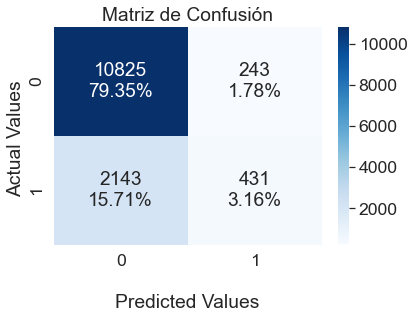

In [196]:
print('Accuracy',accuracy_score(y_test,predict))
print('Precision',precision_score(y_test, predict))
print('Recall',recall_score(y_test,predict))
print('F1',f1_score(y_test,predict))
cm = confusion_matrix(y_test, predict)
matrix_confusion(cm)  

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

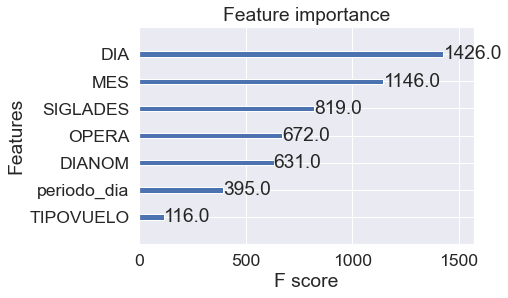

In [197]:
plot_importance(model)

Según el modelo XGBoost, las variables mas importanes en la predicción de un posible atraso son el día y el mes.

### Random Forest

In [176]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [177]:
y_pred=model.predict(X_test)

Accuracy 0.7904999266969652
Precision 0.41012658227848103
Recall 0.2517482517482518
F1 0.3119884448724121


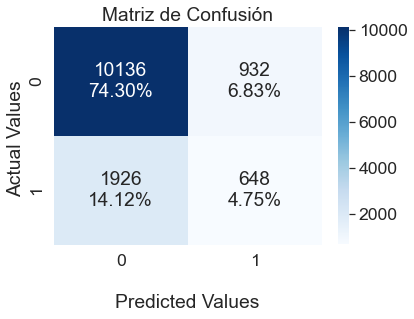

In [180]:
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test, y_pred))
print('Recall',recall_score(y_test,y_pred))
print('F1',f1_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
matrix_confusion(cm)  

## 5. Recomendaciones y evaluaciones

Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?

El modelo xgboost, posee un accuracy del 82%, esto quiere decir que de 100 predicciones 82 se realizarán de forma correcta, a su vez, el Recall es de un 16%, indicando que la prediccion de los atrasos reales que se clasificaron correctamente es baja.

En cambio el modelo Random Forest, sacrifica un porcentaje de accuracy (79%) a cambio de auamentar el recall, esto quiere decir que el modelo random forest clasifica de mejor forma los reales atrasos

Métricas XGBOOST

Accuracy 0.82

Precision 0.63

Recall 0.16

F1 0.26

Métricas Random Forest

Accuracy 0.790

Precision 0.41

Recall 0.25

F1 0.31


## Recomendaciones para mejorar performance de los modelos

Lo principal para mejorar el performance de estos modelos, es incrementar la cantidad de features a la base de datos, asi mismo la cantidad de registros, tales como poder identificar si el dia de vuelo es un fin de semana, o el contexto  actual del país.

Tratar de considerar ampliar la toma de muestras, para poder tener una mayor variedad de registros ya sea en destino o aerolinea

Finalmente, iterar con diveros hiperparametros los modelos predictivos, para encontrar los que se ajusten de mejor forma a la base de datos.